# Tests: Fixed Equation Forms
This notebook tests SHARE fitting on fixed equation forms. 

We bypass `SymbolicRegressor` and interact directly with `gplearn-SHARE` programs, providing them with the equation form to train. We fit them on example data and visualise the results to verify correct fitting. 

 - Sections 1-3 do normal regression and are there to sanity-check `_Program`. 
 - Sections 4- do survival regression to test survival SHARE capabilities. 

## 0. Setup

In [1]:
import numpy as np 
import pandas as pd 
import torch

import matplotlib.pyplot as plt 
import seaborn as sns
sns.set_style("whitegrid")

from gplearn.gplearn._program import _Program 
import survshares.lightning # SBL Patch

%load_ext autoreload
%autoreload 2

In [2]:
from gplearn.gplearn.model import ShapeNN
from gplearn.gplearn.fitness import mean_square_error
from gplearn.gplearn.functions import add2, sub2, mul2, div2, shape1
from sklearn.utils.validation import check_random_state

regression_params = {
    "function_set": [add2, sub2, mul2, div2],
    "arities": {2: [add2, sub2, mul2, div2]},
    "init_depth": (2, 6),
    "init_method": "half and half",
    "n_features": 10,
    "const_range": (-1.0, 1.0),
    "metric": mean_square_error,
    "p_point_replace": 0.05,
    "parsimony_coefficient": 0.1,
    "optim_dict": {
        "alg": "adam",
        "lr": 1e-2,  # disables automatic tuning if provided
        "max_n_epochs": 1000,
        "tol": 1e-3,
        "task": "regression",
        "device": "cpu",
        "batch_size": 1000,
        "shape_class": ShapeNN,
        "constructor_dict": {
            "n_hidden_layers": 5,
            "width": 10,
            "activation_name": "ELU",
        },
        "num_workers_dataloader": 0,
        "seed": 42,
        "checkpoint_folder": "results/checkpoints/test",
        "keep_models": False,
        "enable_progress_bar": False,
    },
    "random_state": check_random_state(415),
}

## 1. No Shape Functions

We first test a simple program with no shape functions as a sanity check.

In [3]:
from sklearn.utils._testing import assert_array_almost_equal


def test_program():
    """Check executing the program works"""

    # Test for a small program
    test_gp = [mul2, div2, 8, 1, sub2, 9, 0.5]
    X = np.reshape(regression_params["random_state"].uniform(size=50), (5, 10))
    gp = _Program(program=test_gp, **regression_params)

    result = gp.execute(torch.Tensor(X))
    expected = (X[:, 8] / X[:, 1]) * (X[:, 9] - 0.5)
    assert_array_almost_equal(result, expected)


test_program()

## 2. Univariate Regression 

We check the shapes learned by fitting these univariate equations:

1. $y=x^2$
2. $y=x^3$
3. $y=x+5$
4. $y=x$ (thus $s(x) = x)$
5. $y=sin(x)$
6. $y=cos(exp(tan(x)))$ 

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 4.6309018216561526e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 9.131185652222484e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 0.00032111332984641194


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 1.9950179193983786e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 4.687056934926659e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 2.1612286218442023e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

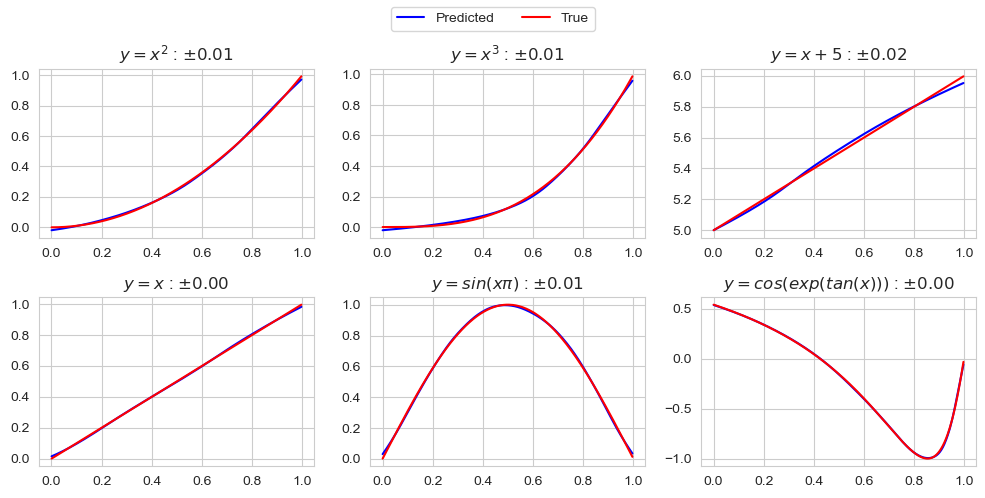

In [4]:
def test_shares_univariate():
    test_share = [shape1, 0]
    X_train, X_test = np.sort(np.random.rand(1000, 1), axis=0), np.sort(np.random.rand(1000, 1), axis=0)

    tests = {
        'y=x^2': lambda x: x ** 2,
        'y=x^3': lambda x: x ** 3,
        'y=x+5': lambda x: x + 5,
        'y=x': lambda x: x,
        'y=sin(x \pi)': lambda x: np.sin(x*np.pi),
        'y=cos(exp(tan(x)))': lambda x: np.cos(np.exp(np.tan(x))),
    }

    fig, axes = plt.subplots(2, 3, figsize=(10, 5))

    results = {}
    for ax, (name, func) in zip(axes.flatten(), tests.items()):
        y_train, y_test = func(X_train[:, 0]), func(X_test[:, 0])
        gp = _Program(program=test_share, **regression_params)
        gp.raw_fitness(torch.Tensor(X_train), torch.Tensor(y_train), None)
        y_pred = gp.execute(torch.Tensor(X_test))
        results[name] = np.abs(y_pred - y_test).mean()

        ax.plot(X_test, y_pred, label='Predicted', color='blue')
        ax.plot(X_test, y_test, label='True', color='red')
        ax.set_title(f'${name}$ : $\pm {results[name]:.2f}$')


    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    return fig, results

fig_univariate, results_univariate = test_shares_univariate()

## 3. Multivariate Regression

Next we check the following equations with more variables:

1. $y=x_1 + x_2$ (thus $s(x) = x$)
2. $y=x_1^2 + x_2/2$
3. $y=s(x_1) + s(x_2) + s(x_3)$ (risk study)

We observe that the learned shape functions are vertically translated from the ground truth - this is expected.

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


add(shape(X0), shape(X1))


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


add(shape(X0), shape(X1))
add(shape(X0), shape(X1)) | raw_fitness: 7.596026989631355e-05


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


add(shape(X0), shape(X1))


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


add(shape(X0), shape(X1))
add(shape(X0), shape(X1)) | raw_fitness: 0.00014781083154957741


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

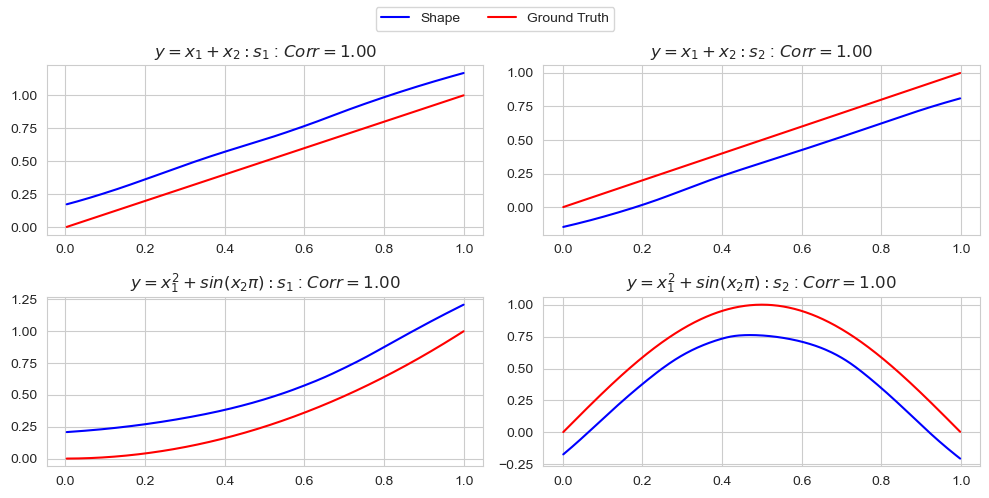

In [5]:
def test_shares_bivariate():
    test_share = [add2, shape1, 0, shape1, 1]
    X_train, X_test = np.random.rand(1000, 2), np.random.rand(1000, 2)

    tests = {
        'y=x_1 + x_2': [
            lambda x: x, 
            lambda x: x 
        ],
        'y=x_1^2 + sin(x_2 \pi)': [
            lambda x: x ** 2, 
            lambda x: np.sin(x * np.pi)
        ],
    }

    fig, axes = plt.subplots(2, 2, figsize=(10, 5))
    results = {}

    for ax_row, (name, functions) in zip(axes, tests.items()):
        y_train = functions[0](X_train[:, 0]) + functions[1](X_train[:, 1])
        y_test = functions[0](X_test[:, 0]) + functions[1](X_test[:, 1])

        gp = _Program(program=test_share, **regression_params)
        gp.raw_fitness(torch.Tensor(X_train), torch.Tensor(y_train), None)
        y_pred = gp.execute(torch.Tensor(X_test))

        for i, (ax, func, shape, x_true) in enumerate(zip(ax_row, functions, gp.model.shape_functions, X_test.T)):
            x_true = np.sort(X_test[:, i])
            s_true = func(x_true)
            shape.to(torch.device('cpu'))
            with torch.no_grad():
                s_pred = shape(torch.Tensor(x_true)).flatten()

            result = np.corrcoef(s_pred.numpy(), s_true)[0, 1]
            results[f'{name}_{i}'] = result
            ax.plot(x_true, s_pred, label='Shape', color='blue')
            ax.plot(x_true, s_true, label='Ground Truth', color='red')
            ax.set_title(f'${name}: s_{i+1}$ : $Corr={result:.2f}$')

    handles, labels = axes[0][0].get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    fig.tight_layout(rect=[0, 0, 1, 0.95])

    return fig, results

fig_bivariate, results_bivariate = test_shares_bivariate()

### 3.1 Risk Score Study
We test the risk score experiment from the SHAREs manuscript. 

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


add(add(shape(X0), shape(X1)), shape(X2))


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.


add(add(shape(X0), shape(X1)), shape(X2))
add(add(shape(X0), shape(X1)), shape(X2)) | raw_fitness: 0.004394407384097576


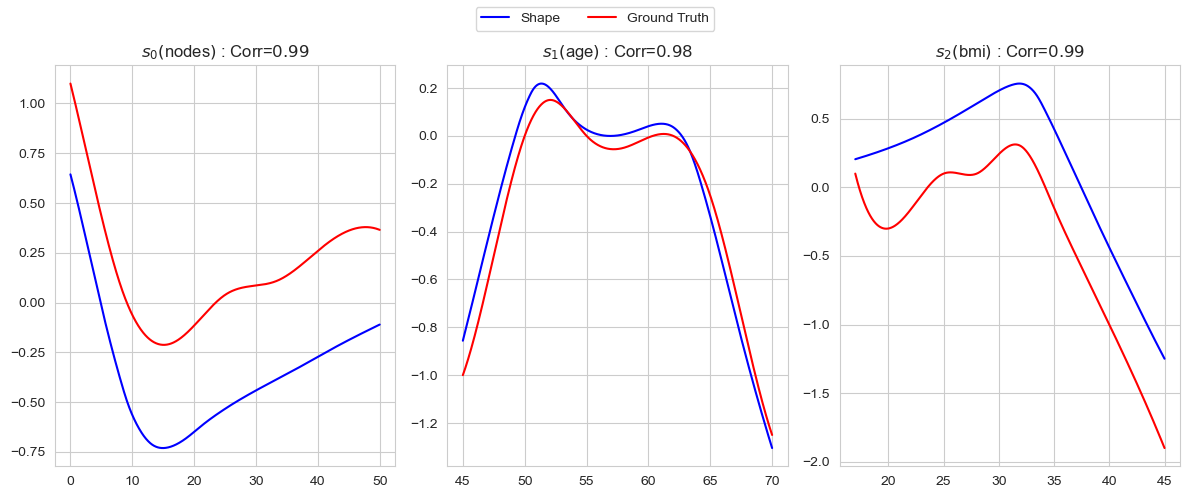

In [6]:
from experiments.risk_scores_data import get_nodes_feature, get_age_feature, get_bmi_feature, generate_data
from sklearn.model_selection import train_test_split

def get_dataset():
    df = generate_data(1000, seed=42)
    X = df.drop(columns=['target']).values
    y = df['target'].values

    return train_test_split(X, y, test_size=0.2, random_state=42)

def test_shares_risk():
    test_share = [add2, add2, shape1, 0, shape1, 1, shape1, 2]
    X_train, X_test, y_train, y_test = get_dataset()

    features = {
        'nodes': (
            get_nodes_feature, 
            (0, 50, 1000)
        ),
        'age': (
            get_age_feature, 
            (45,70,1000)
        ),
        'bmi': (
            get_bmi_feature, 
            (17,45,1000)
        )
    }

    gp = _Program(program=test_share, **regression_params)
    gp.raw_fitness(torch.Tensor(X_train), torch.Tensor(y_train), None)
    
    fig, ax = plt.subplots(1, 3, figsize=(12, 5))
    results = {}

    for i, (ax, shape, (name, (func, ranges))) in enumerate(zip(ax, gp.model.shape_functions, features.items())):
        x_true = np.linspace(*ranges)
        s_true = func()(x_true) 
        shape.to(torch.device('cpu'))
        with torch.no_grad():
            s_pred = shape(torch.Tensor(x_true)).flatten()

        result = np.corrcoef(s_pred.numpy(), s_true)[0, 1]
        results[f'{name}_{i}'] = result
        ax.plot(x_true, s_pred, label='Shape', color='blue')
        ax.plot(x_true, s_true, label='Ground Truth', color='red')
        ax.set_title(f'$s_{i}(${name}$)$ : Corr=${result:.2f}$')

    handles, labels = ax.get_legend_handles_labels()
    fig.legend(handles, labels, loc='upper center', ncol=2)
    fig.tight_layout(rect=[0, 0, 1, 0.95])
    
    return fig, results 

fig_risk, results_risk = test_shares_risk()

## 4. Proportional Hazards Survival 

We test fitting PH survival with certain fixed forms. 
 - Univariate Model: $T = X_1$ 
 - Additive Model: $\exp h(t|x) = h_0(t) + s_1(x_1) + \cdots + s_k(x_k)$

### 4.1 Univariate Hazard

We specify $f(x) = e^x$ and $h_0 = \lambda \implies H_0(t) = \lambda t$. With this, $H(t|x) = \lambda t e^x \implies S(t|x) = \exp(-\lambda t e^x)$. Letting, $S(t|x) \sim U(0,1)$, we solve for $t$ and thus sample event times.

A Cox model fitted on this data should identify $\beta = 1$ in the linear predictor. Our univariate SHARE should learn $s(x)$ to be the exponential function.

In [17]:
from survshares.metrics import negative_pll
from gplearn.gplearn.fitness import make_fitness
def fitness_npll_shrink(y_true, y_pred, sample_weight):
    """
    Partial log-likelihood with shrink penalty for gplearn. Smaller is better.
    """
    pll = negative_pll(y_true, y_pred, sample_weight)
    return pll + 0.05 * np.abs(y_pred).mean()


fitness_npll_shrink = make_fitness(
    function=fitness_npll_shrink, greater_is_better=False
)

In [102]:
from survshares.loss import approximateNpllLoss, npllLoss

survival_params = {
    "function_set": [add2, sub2, mul2, div2],
    "arities": {2: [add2, sub2, mul2, div2]},
    "init_depth": (2, 6),
    "init_method": "half and half",
    "n_features": 1,
    "const_range": (-1.0, 1.0),
    "metric": fitness_npll_shrink,
    "p_point_replace": 0.05,
    "parsimony_coefficient": 0.1,
    "optim_dict": {
        "alg": "adam",
        "lr": 1e-2,  
        "max_n_epochs": 1000,
        "tol": 1e-3,
        "task": "survival",
        "device": "cpu",
        "batch_size": 1000,
        "shape_class": ShapeNN,
        "constructor_dict": {
            "n_hidden_layers": 5,
            "width": 10,
            "activation_name": "ELU",
        },
        "num_workers_dataloader": 0,
        "seed": 42,
        "checkpoint_folder": "results/checkpoints/test",
        "keep_models": False,
        "enable_progress_bar": False,
        "loss_fn": approximateNpllLoss()
    },
    "random_state": check_random_state(415),
}

In [103]:
from lifelines import CoxPHFitter
def generate_exponential_data(n=5000, lamb=0.1, C=60):
    U, X = np.random.rand(n), np.random.uniform(0, 1, n)
    T = -np.log(U) / (lamb * np.exp(X))
    Y = np.minimum(T, C)
    E = (T <= C).astype(int)

    return X.reshape(-1,1), Y, E

X, T, E = generate_exponential_data()

cph = CoxPHFitter().fit(pd.DataFrame({'T': T, 'E': E, 'X': X[:,0]}), duration_col='T', event_col='E')
print(cph.params_)

covariate
X    1.024257
Name: coef, dtype: float64


GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/callbacks/model_checkpoint.py:654: Checkpoint directory /Users/stybl/Source/SurvSHAREs/results/checkpoints/test/unknown exists and is not empty.
GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs


shape(X0)
shape(X0) | raw_fitness: 5.959859848022461


/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

0.9880787955157514


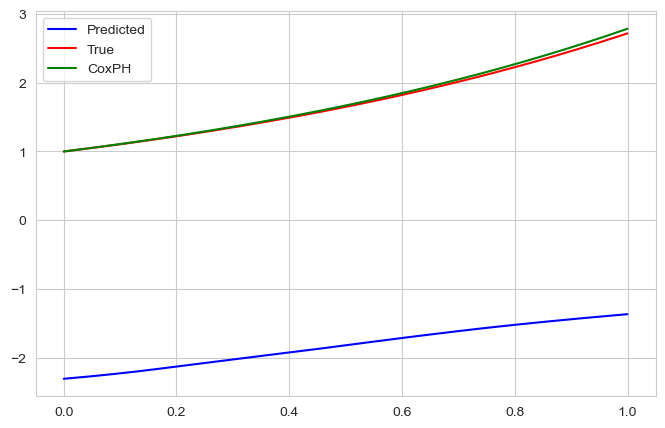

In [104]:
test_share = [shape1, 0]

gp = _Program(program=test_share, **survival_params)
gp.raw_fitness(torch.Tensor(X), torch.Tensor(T), torch.Tensor(E))
y_pred = gp.execute(torch.Tensor(X))
idx = np.argsort(X[:,0])
fig, ax = plt.subplots(figsize=(8, 5))
ax.plot(X[idx], y_pred[idx], label='Predicted', color='blue')
ax.plot(X[idx], np.exp(X[idx]), label='True', color='red')
ax.plot(X[idx], np.exp(cph.params_['X'] * X[idx]), label='CoxPH', color='green')
ax.legend()
print(np.corrcoef(y_pred, np.exp(X[:,0]))[0,1])

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

GPU available: True (mps), used: False
TPU available: False, using: 0 TPU cores
HPU available: False, using: 0 HPUs
/Users/stybl/mamba/envs/shares/lib/python3.11/site-packages/pytorch_lightning/trainer/setup.py:177: GPU available but not used. You can set it by doing `Trainer(accelerator='gpu')`.


Predicting: |          | 0/? [00:00<?, ?it/s]

{'mean_absolute_difference_binned': np.float64(0.0229794181866458),
 'mean_absolute_difference_smoothed': np.float64(0.0034213618600289672),
 'median_absolute_difference_binned': np.float64(0.019800073004993812),
 'median_absolute_difference_smoothed': np.float64(0.0033147217041586408)}

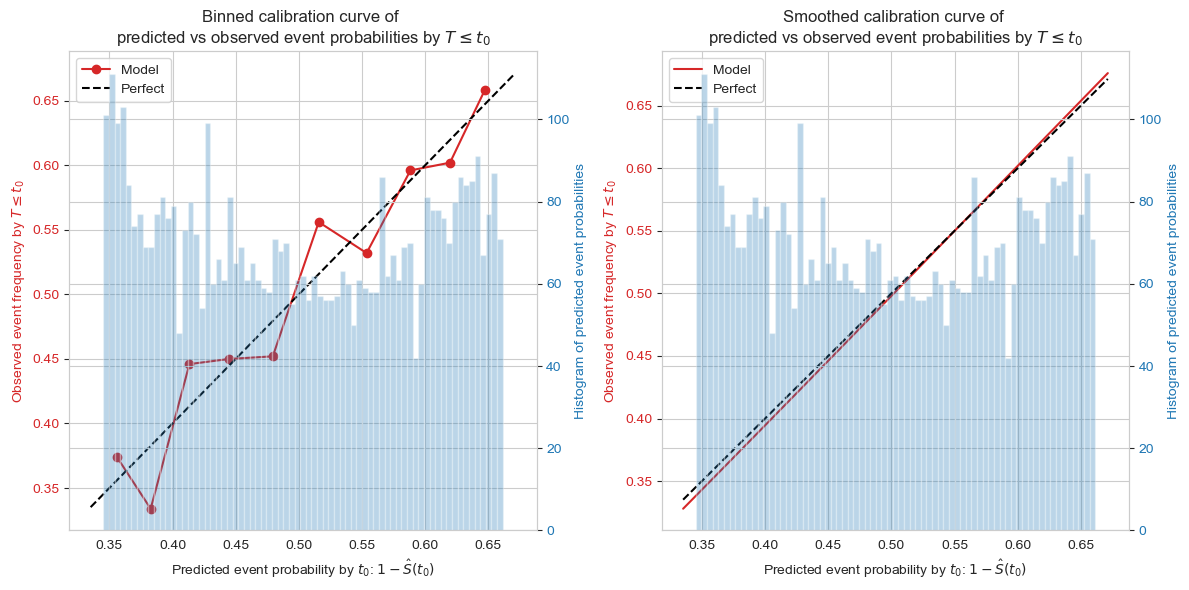

In [106]:
from survshares.hazard_model import HazardModel
model = HazardModel(gp).prepare_estimands(X, T, E)

model.plot_calibration(torch.Tensor(X), torch.Tensor(T), torch.Tensor(E), t0=np.unique(T)[2500])